In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from dateutil.parser import parse
import numpy as np
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS

In [2]:
eventos = pd.read_csv('data/events.csv')
eventos.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Analisis de palabras claves de las busquedas que realizaron los usuarios

In [3]:
#Busquedas son de tipo evento 'searched products'
busquedas = eventos.loc[:,['event','person','search_term']]
busquedas = busquedas.loc[busquedas.event == 'searched products']
busquedas = busquedas.loc[busquedas.search_term.notnull()]
busquedas.describe()

,event,person,search_term
count,48967,48967,48967
unique,1,7089,5851
top,searched products,e2b0ce1b,Iphone
freq,48967,414,1207


In [4]:
busquedas.head(30)

,event,person,search_term
157,searched products,00204059,moto g 4
159,searched products,00204059,moto g 4
238,searched products,0024ad28,comprar celulares usados bom e barato em poa rs
239,searched products,0024ad28,comprar celulares seminovos bom e barato em po...
240,searched products,0024ad28,comprar celulares seminovos bom e barato em po...
288,searched products,0026fd72,Samsung Galaxy S7
357,searched products,002932b1,Iphone 6
371,searched products,00300ace,CARREGADOR IPHONE 6S
674,searched products,00420f4e,Iphone 6 plus
695,searched products,004bd8f4,j7


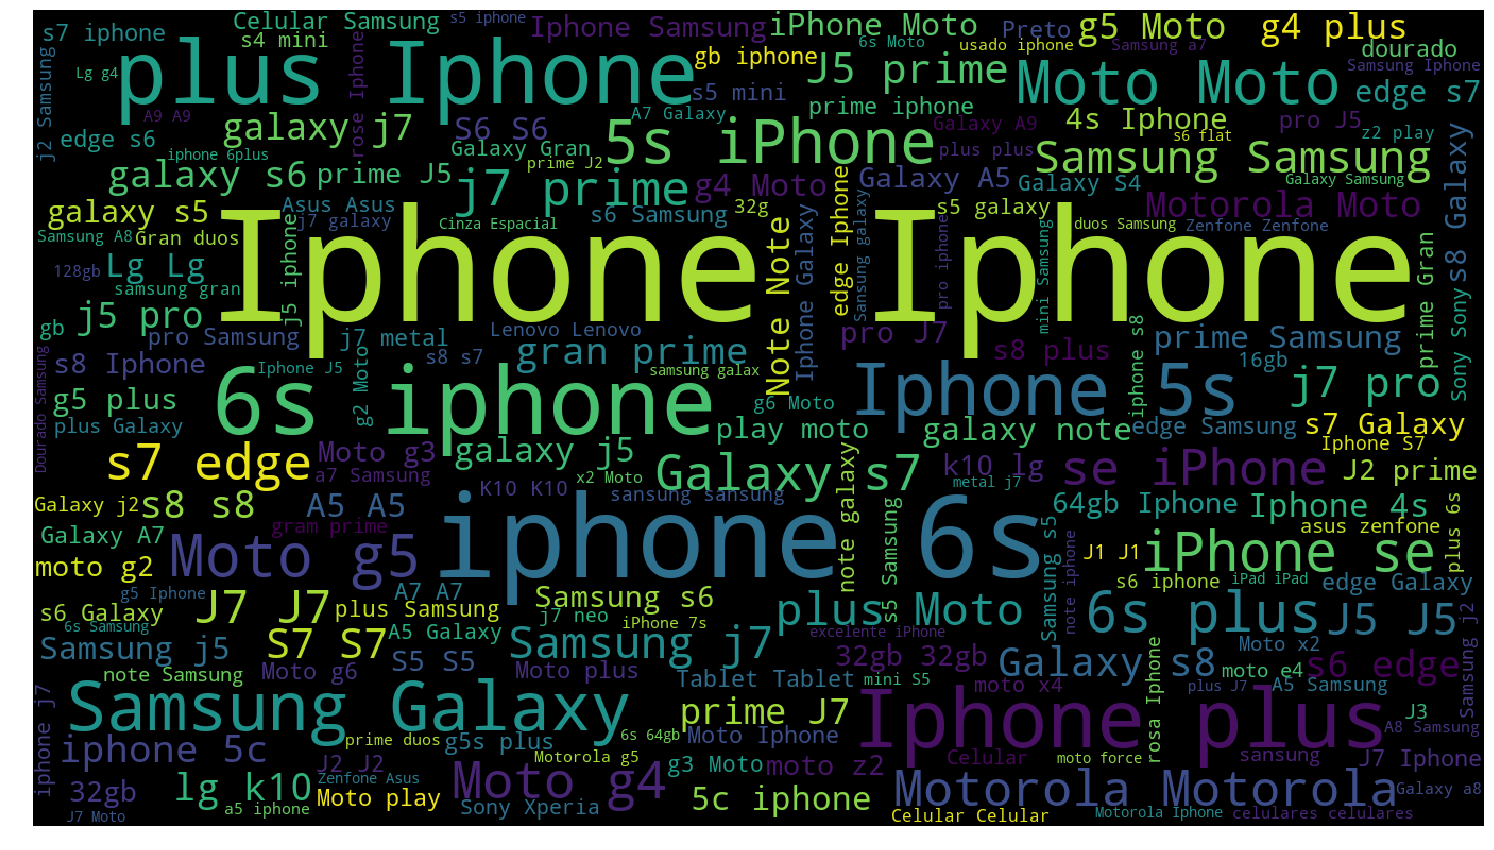

In [15]:
wordcloud = WordCloud(width=1366, height=768).generate(' '.join(busquedas.search_term))
plt.figure(figsize=(30,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [6]:
#Agrupo por person y search_term para eliminar duplicados
busquedas_agrupadas = busquedas.groupby(['person','search_term']).count()['event'].reset_index()
busquedas_agrupadas.drop('event', axis=1, inplace=True)
busquedas_agrupadas.describe()

,person,search_term
count,20647,20647
unique,7089,5851
top,db6f0288,iphone 6
freq,151,346


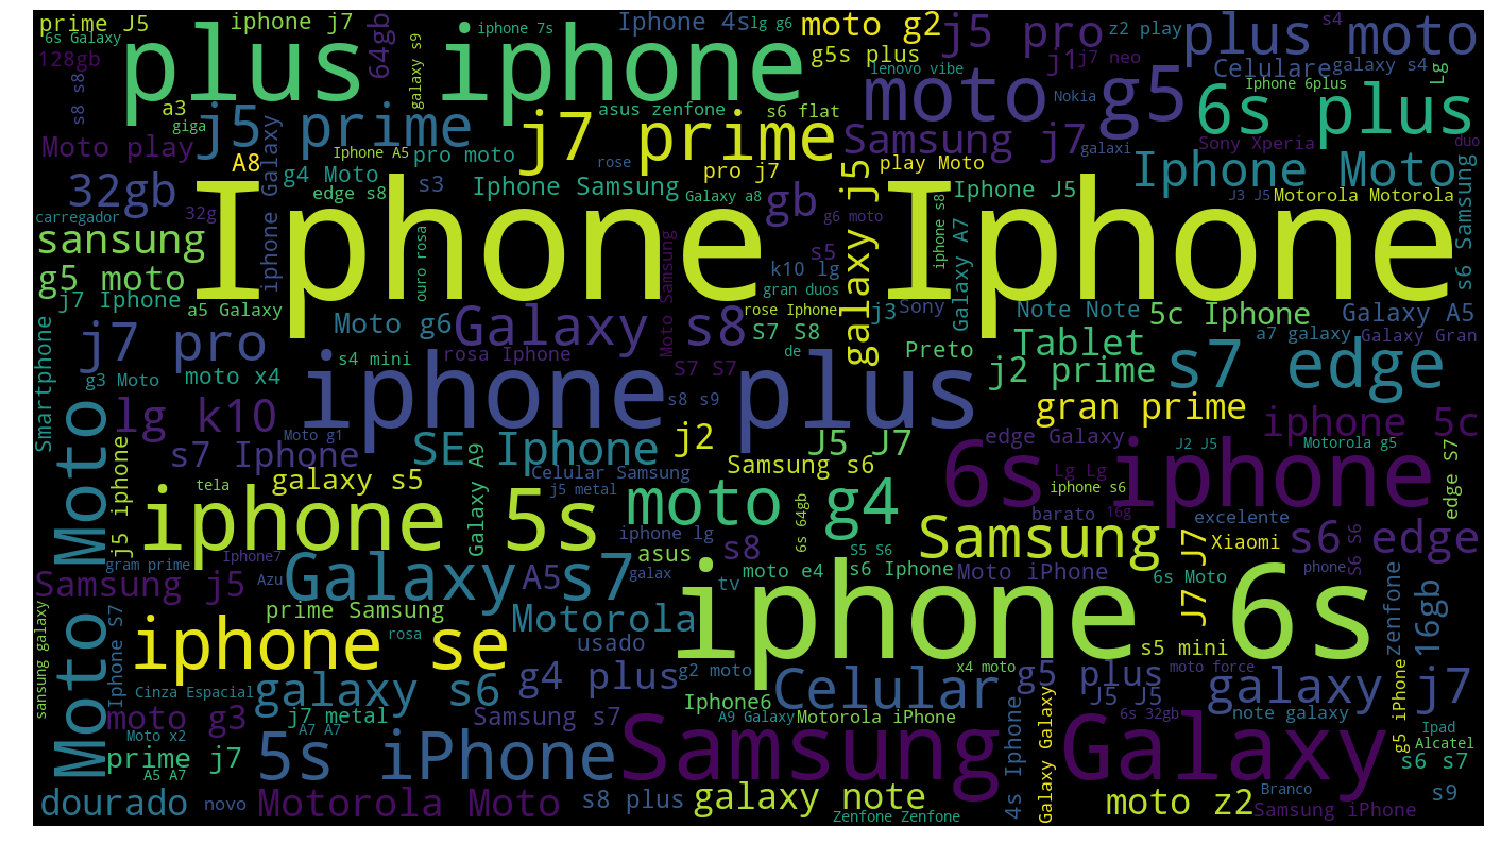

In [18]:
#De 48967 busquedas se agruparon en 20647
wordcloud_agrupadas = WordCloud(width=1366, height=768).generate(' '.join(busquedas_agrupadas.search_term))
plt.figure(figsize=(30,15))
plt.imshow(wordcloud_agrupadas)
plt.axis("off")
plt.show()

Checkeo si en los eventos de compras de cada usuario se tienen en cuenta las mismas busquedas

In [8]:
compras = eventos.loc[:,['event','person']]
compras = compras.loc[(compras.event == 'checkout') | (compras.event == 'conversion')]
compras.describe()

,event,person
count,34907,34907
unique,2,27624
top,checkout,52a4edd3
freq,33735,39


In [9]:
#Hay 27624 usuarios que compraron productos
#Hay 7089 usuarios que realizaron busquedas 
compras = compras.groupby('person').count()['event'].reset_index()
compras.drop('event', axis=1, inplace=True)
compras.describe()

,person
count,27624
unique,27624
top,3657392a
freq,1


In [10]:
busquedas_exitosas = pd.merge(compras, busquedas, on='person', how='inner')
busquedas_exitosas.describe()

,person,event,search_term
count,48967,48967,48967
unique,7089,1,5851
top,e2b0ce1b,searched products,Iphone
freq,414,48967,1207


Por lo tanto, las 7089 usuarios que realizaron la busquedas forman parte de los 27624 que realizaron las compras.

Checkeo si en los eventos de vistas de productos de cada usuario se tienen en cuenta las mismas busquedas

In [11]:
vistas_productos = eventos.loc[:,['event','person']]
vistas_productos = vistas_productos.loc[(vistas_productos.event == 'viewed product')]
vistas_productos.describe()

,event,person
count,528931,528931
unique,1,26316
top,viewed product,2d5a84c1
freq,528931,1525


In [12]:
vistas_productos = vistas_productos.groupby('person').count()['event'].reset_index()
vistas_productos.drop('event', axis=1, inplace=True)
vistas_productos.describe()

,person
count,26316
unique,26316
top,3657392a
freq,1


In [13]:
vistas_productos = vistas_productos.merge(compras, how='inner', on='person')
vistas_productos.describe()

,person
count,26316
unique,26316
top,3657392a
freq,1


Por lo tanto, todas los usuarios que vieron algunos productos, terminaron comprando al menos un producto.
Hay 26316 usuarios que vieron algunos productos.
Hay 27624 usuarios que compraron algunos productos.
Hay 1308 usuarios que compraron sin ver el producto.
Donde los 7089 usuarios que realizaron las busquedas forman parte de esta relacion.